In [120]:
import gym
from gym import envs
from IPython import display
import itertools 
from collections import defaultdict 
import plotting 
import numpy as np
import random
import pylab as plt
from IPython.display import clear_output
from time import sleep

In [38]:
#print(envs.registry.all())

In [39]:
env = gym.make('Taxi-v2')

In [40]:
env.reset()

271

In [55]:
#0-south
#1=north
#2=east
#3=west
#4=pick
#5=drop

In [80]:
def qlearning(env, num_episodes, discount_factor, alpha, epsilon):
    penalties =0
    reward = 0
    score = []
    num_actions = env.action_space.n
    num_states = env.observation_space.n
    Q = np.zeros((num_states,num_actions))
    for i in range(num_episodes):
        state = env.reset()
        done = False
        while done == False:
            if np.random.uniform(0,1) < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(Q[state])
                
            next_state, reward, done, _ = env.step(action) 
            
            Q[state, action] = (1-alpha)*Q[state, action] + alpha*(reward + discount_factor*np.max(Q[next_state]))
            
            if reward == -10:
                penalties += 1
                
            state = next_state
            
        if i % 100 == 0:
            
            print("episode = " + str(i) + '/' + str(num_episodes))
        if (np.max(Q) > 0):
            score.append(np.sum(Q/np.max(Q)*100))
            #score.append(np.max(Q))
        else:
            score.append(0)
        
    print("Training Finished.\n")
    
    
    return Q, score
    
    

In [129]:
num_episodes = 1000
discount_factor = 0.9
alpha = 1.0
epsilon = 1.0

In [130]:
Q,scores = qlearning(env, num_episodes, discount_factor, alpha, epsilon)

episode = 0/1000
episode = 100/1000
episode = 200/1000
episode = 300/1000
episode = 400/1000
episode = 500/1000
episode = 600/1000
episode = 700/1000
episode = 800/1000
episode = 900/1000
Training Finished.



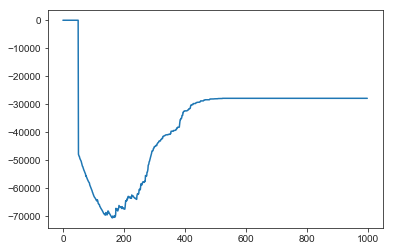

In [131]:
plt.plot(scores)
plt.show()

In [132]:
print(Q[421,2])

-3.1369622635116987


In [133]:
def evaluate_performance(Q):
    episodes = 10
    frames = []
    for i in range(episodes):
        done = False
        state = env.reset()
        while done == False:
            action = np.argmax(Q[state])
            state,reward,done,_ = env.step(action)
            frames.append({
                'frame': env.render(mode='ansi'),
                
                }
            )
    return frames   
        

In [134]:
def print_frames(frames):
    for i,frame in enumerate(frames):
        clear_output(wait=True)
        print(frame['frame'])
        
        sleep(1)
        


In [135]:
frames = evaluate_performance(Q)

In [136]:
print_frames(frames)

+---------+
|R: | : :G|
| :_: : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)



KeyboardInterrupt: 

In [ ]:
env.close()